In [1]:

import sys
import os
sys.path.append(os.path.abspath("C:\\Users\\darae\\Downloads\\ZephyrRL-Training\\ZephyrRL-Training"))

from src.training_algorithms.reinforce import REINFORCE
from src.env.sailboat_env import SailboatEnv
from src.utils.plotting import training_reward


import torch
import time
import numpy as np
from datetime import timedelta


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


Saved model at episode 0
Episode 0: Reward -1.35, Avg (last 10): -1.35
Estimated Remaining: 1 day, 8:00:31
Episode 25: Reward -1.52, Avg (last 10): -1.30
Estimated Remaining: 2:21:01
Episode 50: Reward -1.98, Avg (last 10): -1.33
Estimated Remaining: 3:21:29
Episode 75: Reward -1.94, Avg (last 10): -1.78
Estimated Remaining: 2:47:12
Saved model at episode 100
Episode 100: Reward -1.96, Avg (last 10): -1.55
Estimated Remaining: 3:04:54
Episode 125: Reward -1.90, Avg (last 10): -1.35
Estimated Remaining: 2:44:30
Episode 150: Reward -1.41, Avg (last 10): -1.64
Estimated Remaining: 2:47:40
Episode 175: Reward -1.17, Avg (last 10): -1.64
Estimated Remaining: 2:34:20
Saved model at episode 200
Episode 200: Reward -2.01, Avg (last 10): -1.49
Estimated Remaining: 2:57:15
Episode 225: Reward -1.79, Avg (last 10): -0.97
Estimated Remaining: 2:46:19
Episode 250: Reward -1.15, Avg (last 10): -1.69
Estimated Remaining: 2:40:51
Episode 275: Reward -1.83, Avg (last 10): -1.61
Estimated Remaining: 2:3

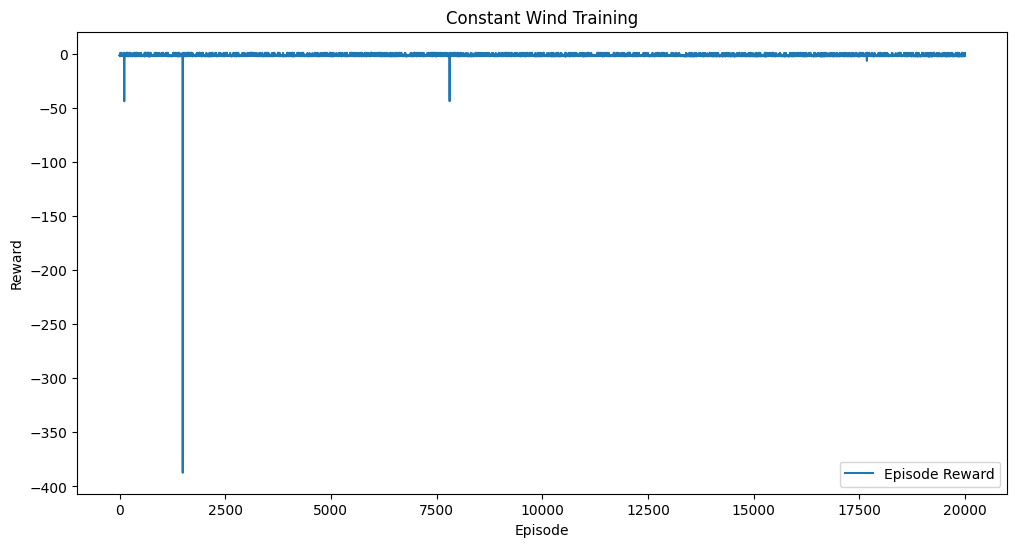

In [12]:
model_path = "../model_saves/constant_wind_model.pth"



#Parameters
total_episodes = 20000
save_interval = 100
info_interval = 25
draw_interval = 50



wind_settings = {
    "type": "fixed",
    "wind_speed": 10, 
    "theta_wind": 3*np.pi/4, 
    
}

#env = SailboatEnv(**ENV_PARAMS)
env = SailboatEnv(wind_settings)

obs_space_dims = 8
action_space_dims = 1


agent = REINFORCE(obs_space_dims, action_space_dims)
reward_over_episodes = []

start_time = time.time()  

# Training loop
for episode in range(total_episodes):
    episode_start_time = time.time()  
    obs = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = agent.sample_action(obs)
        obs, reward, done, _ = env.step(action)
        agent.rewards.append(reward)
        episode_reward += reward
        
        if episode % draw_interval == 0:  
            time.sleep(1/60)
            env.draw()
    
    reward_over_episodes.append(episode_reward)
    agent.update()
    
    # Calculate time per episode
    episode_time = time.time() - episode_start_time  
    elapsed_time = time.time() - start_time  

    # Estimate total training time
    estimated_total_time = (elapsed_time / (episode + 1)) * total_episodes
    remaining_time = estimated_total_time - elapsed_time
    
    if episode % save_interval == 0:
        torch.save(agent.net.state_dict(), model_path)
        print(f"Saved model at episode {episode}")
    
    if episode % info_interval == 0:
        avg_reward = np.mean(reward_over_episodes[-10:])
        print(f"Episode {episode}: Reward {episode_reward:.2f}, Avg (last 10): {avg_reward:.2f}")
        print(f"Estimated Remaining: {timedelta(seconds=int(remaining_time))}")
        
        
training_reward(reward_over_episodes, 'Constant Wind Training')

In [2]:
torch.cuda.is_available()

True